## Task 1

There are some promotion activities happening in a store. You can get a 10% discount when the total price is between £20 and £40, inclusive. If the total price is greater than £40, you can get a 15% discount.

Write a function to take a list of *quantity* and a list of *unit price* as inputs and return the *discounted_price* (e.g. for a 10% discount, *discounted_price = total_price * (1-0.1)*). Please use the following lists to test your function: *quantity = [2, 4, 6], unit price = [5, 6.99, 3.59]*.

In [2]:
import pandas as pd
from google.colab import drive
import re
from matplotlib import pyplot as plt
import random
import numpy as np

# Defining the function so it can take two separate lists of prices and quantity
# and apply DataFrame methods. The function will return the non-discounted total
# in a sentence, to provide the user with context, as well as the discount applied,
# with the resulting price, also in a sentence.
def get_discount(quantity, unit_price):
  data_tuples = list(zip(quantity, unit_price))
  data = pd.DataFrame(data_tuples, columns = ["quantity", "unit_price"])
  data["purchase_price"] = data.quantity * data.unit_price
  total_price = sum(data.purchase_price)
  print("The total price is {}.".format(round(total_price, 2)))
  if 20 <= total_price <= 40:
    discounted_price = total_price * .9
    return("Therefore a discount of 10% can be applied, and the discounted price is {}.".format(round(discounted_price, 2)))
  elif total_price > 40:
    discounted_price = total_price * .85
    return("A discount of 15% can therefore be applied, and the discounted price is {}.".format(round(discounted_price, 2)))
  else:
    return("No discount can be applied.")

# Calling the function
quantity = [2, 4, 6]
unit_price = [5, 6.99, 3.59]
print(get_discount(quantity, unit_price))

The total price is 59.5.
A discount of 15% can therefore be applied, and the discounted price is 50.57.


## Task 2

Go to **LEARN--20COP504--Coursework section** and download **drinks.txt**. **drinks.txt** records the sale status of different drinks (cappuccino, tea, espresso) over a specific date.
### 2.1
Write a program to read the **drinks.txt** file and calculate the total sale of each kind of drink.
Please note that due to typo errors, the word cappuccino is sometimes recorded as cappuccin. The word cappuccin should be counted as cappuccino.

In [3]:
# Leaving this code for my preferential use
# Mounting my Google Drive so data can be read from it 
# drive.mount("/content/drive", force_remount = True)
# with open("/content/drive/My Drive/!proj/first_python_cw/drinks.txt", "r") as drinks_file:
#  drinks_data = drinks_file.read()

# For the purpose of this assignment, however, the below will be used to read the data
with open("drinks.txt", "r") as drinks_file:
  drinks_data = drinks_file.read()

# Printing the data to examine them and understand how to carry the search
# Note that if the data was a larger sample, it would be preferable to print the
# unique values only, for example turning the data into a DataFrame and using
# the .unique() method from pandas
print(drinks_data)

# Using "?" for the regex search to look for both the correct spelling of cappuccino
# and the mispelling observed in the data.
# "?" allows to search for patterns where the character before "?" is optional
re_list = ["espresso", "tea", "cappuccino?"]
drinks = []
for r in re_list:
   drinks += re.findall( r, drinks_data)
# Uncomment the below to see the clean list obtained with the regex
# print(drinks)

# Printing wrapped up in a full sentence to make the output more meaningful for the user
print("\nThere was a total of " + str(len(drinks)) + " drinks sold: "
+ "this included " + str(len(re.findall("tea", drinks_data))) + " teas, "
+ str(len(re.findall("espresso", drinks_data))), "espressos, and "
+ str(len(re.findall("cappuccino?", drinks_data))), "cappuccinos.")

cappuccino, tea, espresso, tea, cappuccino, tea, espresso,cappuccino, tea, espresso
cappuccino, tea, espresso, tea, cappuccin, tea, espresso,espresso,cappuccino, tea, espresso
tea, espresso, tea,tea, espresso, tea,espresso,espresso,cappuccin
cappuccino, tea, espresso, tea,cappuccino, tea, espresso,espresso, tea,
tea, espresso, tea,tea, espresso,cappuccin
tea,espresso,espresso,tea,tea, espresso,espresso,cappuccin
espresso, tea,tea, cappuccin, espresso, tea,espresso,espresso,cappuccin
tea, espresso, tea, cappuccin, tea, espresso,espresso,cappuccino, tea, espresso
tea, espresso, tea, cappuccin, tea, espresso,cappuccino, tea, espresso
tea, espresso, tea, cappuccin, tea, espresso
['espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'es

### 2.2
Draw a bar chart to illustrate the popularity of the drinks.

In [ ]:
drinks = ["tea", "espresso", "cappuccino"]
# Using regex here again to count the number of occurrences for each drink,
# regardless of the mispelling
# This will also allow to apply the code even if the data change (as long as no
# other mispelling or new drink is entered)
sales = [int(len(re.findall("tea", drinks_data))), int(len(re.findall("espresso", drinks_data))), int(len(re.findall("cappuccino?", drinks_data)))]

# Visualising the number of drinks sold per category: the barplot is a well-suited
# option here
#  Note that `color` and `edgecolor` can be used to customize the chart if wished
# too (a list of colour names is available here:
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
plt.bar(drinks, sales, color = "lightsteelblue", edgecolor = "black")
plt.title("Popularity of each drink")
plt.xlabel("Drink type")
plt.ylabel("Sales")
plt.show()

## Task 3
### 3.1
Generate an array x with 100 random integers from 0 to 50.

In [ ]:
# Using NumPy to generate the array
x = np.array([random.randint(0, 50) for n in range(100)])
# Printing the array and its length to double check
print(x)
print(range(len(x)))

[13 46 24  3  5  2 37 41 26 13 33 40  7 10 18 15 12 38 20 34 37 50 46 22
 32 23 29 43  6 36 40 49 13 15 40  6 38 28 34 45  6 44 11  7 34 35 34 23
  3 25  3 21 28 35 15 28 30 18 15 46 48 26 18 19 14 25 43 22  4  9 11 35
 42 34 10 21 29 39  8  5 42 16 29 42 32 33  8 34 16 37  1 30 29 50  1  1
  0 47  3 26]
range(0, 100)


### 3.2
Write a function named **MaxFun** (use **for** loop inside the function) to calculate the maximum value of array **x**.

In [ ]:
# Defining the function adding exception if applied to an empty list
# The `for` loop allows to take the first integer in the array and then iterates
# through each next item to see if it is larger
# If larger, the `max_value` is replaced with the item that has just been
# compared to the first one, and next iterations carry on the comparison with this new item
def MaxFun(x):
  try:
    max_value = x[0]
    for intg in x:
      if intg > max_value:
        max_value = intg
    return max_value
  except:
      if len(x) == 0:
        return("impossible to compute as this array is empty")

# Returning the maximum value wrapped in a sentence for increased legibility for the user
print("The minimum value in the random array x is " + str(MaxFun(x)) + ".")

The minimum value in the random array x is 50.


### 3.3
Write a function named **MinFun** (use **for** loop inside the function) to calculate the minimum value of array


In [ ]:
# Defining the function as above for the max value, but comparing values looking
# for the smallest, at each iteration
def MinFun(x):
  try:
    min_value = x[0]
    for intg in x:
      if intg < min_value:
        min_value = intg
    return min_value
  except:
      if len(x) == 0:
        return("This list is empty, a minimum value cannot be calculated.")

# Again returning the minimum value wrapped in a sentence for increased legibility
# for the user
print("The minimum value in the random array x is " + str(MinFun(x)) + ".")

The minimum value in the random array x is 0.


### 3.4
Normalize array **x** by using **x_normed = (x - minimum) / (maximum-minimum)**

In [ ]:
# Normalizing the array by iterating through each integer with a `for` loop
normed_array = []
for intg in x:
  x_normed = ((intg - MinFun(x)) / (MaxFun(x) - MinFun(x)))
  normed_array.append(x_normed)
print(normed_array)

[0.26, 0.92, 0.48, 0.06, 0.1, 0.04, 0.74, 0.82, 0.52, 0.26, 0.66, 0.8, 0.14, 0.2, 0.36, 0.3, 0.24, 0.76, 0.4, 0.68, 0.74, 1.0, 0.92, 0.44, 0.64, 0.46, 0.58, 0.86, 0.12, 0.72, 0.8, 0.98, 0.26, 0.3, 0.8, 0.12, 0.76, 0.56, 0.68, 0.9, 0.12, 0.88, 0.22, 0.14, 0.68, 0.7, 0.68, 0.46, 0.06, 0.5, 0.06, 0.42, 0.56, 0.7, 0.3, 0.56, 0.6, 0.36, 0.3, 0.92, 0.96, 0.52, 0.36, 0.38, 0.28, 0.5, 0.86, 0.44, 0.08, 0.18, 0.22, 0.7, 0.84, 0.68, 0.2, 0.42, 0.58, 0.78, 0.16, 0.1, 0.84, 0.32, 0.58, 0.84, 0.64, 0.66, 0.16, 0.68, 0.32, 0.74, 0.02, 0.6, 0.58, 1.0, 0.02, 0.02, 0.0, 0.94, 0.06, 0.52]


## Task 4
### 4.1
Create a DataFrame named **dfRetail** (you can create it from Dictionary, Lists or Numpy arrays). The DataFrame should contain five columns, including the information about **product_name**, **sold_quantity**, **purchase_price**, **selling_price**, and **import_country**. Generate data yourself for each column. The DataFrame must have 10 rows (representing for 10 different products).

In [ ]:
# Creating a list of 10 products
product_name = ["skirt", "t-shirt", "trousers", "hat", "jacket", "socks", "shoes", "dress", "sweater", "shirt"]
# Generating a list of sales numbers randomly
sales = [random.randint(0, 10) for n in range(10)]
# Comment line 4 and uncomment line 8 to create a sales list with more than
# 5 null values, to test if the conditions used to define `explode` in the
# last code cell (4.3) works as expected
# sales = [0, 0, 0, 0, 0, 0, 1, 2, 3, 4]

# Generating a list of purchase prices randomly 
p_prices = [round(random.uniform(0, 10), 2) for n in range(10)]
# Generating a list of selling prices randomly so they are in a higher range than
# the purchase prices.  
s_prices = [round(random.uniform(15, 70), 2) for n in range(10)]
# Creating a list of 10 countries
country = ["morocco", "india", "china", "thailand", "india", "belgium", "italia", "france", "morocco", "morocco"]
# Printing the randomly generated lists for inspection
print(sales, p_prices, s_prices)

# Using `zip` to join the lists
joined_lists = list(zip(product_name, sales, p_prices, s_prices, country)) 
# Then turning the joined lists into a DataFrame
dfRetail = pd.DataFrame(joined_lists, columns = ["product_name", "sold_quantity", "purchase_price", "selling_price", "import_country"])
# Calling the generated DataFrame to check it 
dfRetail

[3, 1, 2, 6, 4, 2, 2, 3, 0, 3] [4.39, 1.63, 5.65, 4.71, 5.71, 3.98, 7.98, 0.91, 9.92, 4.67] [26.33, 43.28, 33.29, 38.09, 36.91, 18.99, 53.97, 45.76, 63.46, 58.93]


product_name  sold_quantity  purchase_price  selling_price import_country
0        skirt              3            4.39          26.33        morocco
1      t-shirt              1            1.63          43.28          india
2     trousers              2            5.65          33.29          china
3          hat              6            4.71          38.09       thailand
4       jacket              4            5.71          36.91          india
5        socks              2            3.98          18.99        belgium
6        shoes              2            7.98          53.97         italia
7        dress              3            0.91          45.76         france
8      sweater              0            9.92          63.46        morocco
9        shirt              3            4.67          58.93        morocco

### 4.2
Add a column named **profit** to **dfRetail.profit** is calculated as follows: *profit = (selling_price - purchase_price) * sold_quantity*.
You need to accomplish this by Python code.

In [ ]:
# Calculating profit as required into a new column called `profit`
dfRetail["profit"] = (dfRetail.selling_price - dfRetail.purchase_price) * dfRetail.sold_quantity
# Calling the updated DataFrame to check it 
dfRetail

product_name  sold_quantity  ...  import_country  profit
0        skirt              3  ...         morocco   65.82
1      t-shirt              1  ...           india   41.65
2     trousers              2  ...           china   55.28
3          hat              6  ...        thailand  200.28
4       jacket              4  ...           india  124.80
5        socks              2  ...         belgium   30.02
6        shoes              2  ...          italia   91.98
7        dress              3  ...          france  134.55
8      sweater              0  ...         morocco    0.00
9        shirt              3  ...         morocco  162.78

[10 rows x 6 columns]

### 4.3
Identify the top five profitable products and present the information via a pie chart.

  product_name  sold_quantity  ...  import_country  profit
3          hat              6  ...        thailand  200.28
9        shirt              3  ...         morocco  162.78
7        dress              3  ...          france  134.55
4       jacket              4  ...           india  124.80
6        shoes              2  ...          italia   91.98

[5 rows x 6 columns] 3       hat
9     shirt
7     dress
4    jacket
6     shoes
Name: product_name, dtype: object
[0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0]


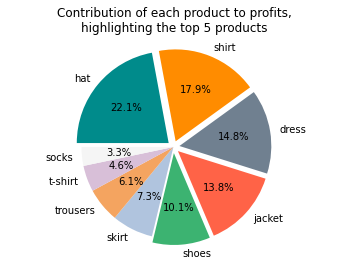

<Figure size 432x288 with 0 Axes>

In [ ]:
# This pie chart will present all products contribution to profits but
# highlight the top 5 (a pie chart with only the top 5 product could be done
# using the contribution of each top 5 product to the sum of the top 5 profits,
# but this was deemed inaccurate as it would distord each top 5 product
# contribution to all profits).
# Products not selling at all will however be excluded to avoid
# the graph being overcrowded with non-useful information.
# NB: An alternative visualization could be to group everything in others

# First the top 5 can be inspected by subsetting the DataFrame
# Note that products that did not sell are excluded to account for the possibiity
# that the random generation of sales numbers coudl theoretically lead to more
# than 5 null values  
dfRetail_top5 = dfRetail[dfRetail.profit > 0].sort_values("profit", ascending = False).head(5)
print(dfRetail_top5, dfRetail_top5.product_name)

# As noted earlier, a pie chart with just the top 5 values would be misleading
# as it would not cover 100% of the sales, and looking only at each top 5 contribution
# within the top 5 would distord each product contribution
# Therefore all the products but the unsold ones are included and sorted prior
# to producing the pie chart
dfRetail_sorted = dfRetail[dfRetail.profit > 0].sort_values("profit", ascending = False)
# As exclusions of products not selling could generate different DataFrame lengths,
# one needs to define the `explode` values dynamically as below
# Further, as the random generation of sales numbers could theoretically generate
# more than 5 null values, the `explode` values are produced conditionally
# to take this into account; that is, if there is more than 5 null sales values,
# all products are top products and therefore all slices for *sold* products
# are exploded
if len(dfRetail_sorted) > 5:
  explode = [0.1] * 5 + [0] * (len(dfRetail_sorted)-5)
else:
  explode = [0.1] * len(dfRetail_sorted)
# Print explode to double-check
print(explode)

# Then setting a set of ten colours for good contrast; these can be customized,
# with colour names available at https://matplotlib.org/3.1.0/gallery/color/named_colors.html
colors = ("darkcyan", "darkorange", "slategray", "tomato", "mediumseagreen", "lightsteelblue", "sandybrown", "thistle", "whitesmoke")

# Producing the pie chart itself
labels = dfRetail_sorted.product_name
sizes = dfRetail_sorted.profit / sum(dfRetail_sorted.profit)
fig1, ax1 = plt.subplots()
ax1.pie(
    sizes,
    labels = labels,
    explode = explode,
    colors = colors,
    autopct = "%1.1f%%",
    startangle = 180,
    counterclock  = False,
    radius = 1.5
)
ax1.axis("equal")
plt.title("Contribution of each product to profits,\nhighlighting the top 5 products")
plt.show()
plt.clf()